In [1]:
import numpy as np 
import pandas as pd 
import datetime
import os

import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv', nrows=10000000)
test_df = pd.read_csv('test.csv')
print train_df.head()

       ip  app  device  os  channel           click_time attributed_time  \
0   83230    3       1  13      379  2017-11-06 14:32:21             NaN   
1   17357    3       1  19      379  2017-11-06 14:33:34             NaN   
2   35810    3       1  13      379  2017-11-06 14:34:12             NaN   
3   45745   14       1  13      478  2017-11-06 14:34:52             NaN   
4  161007    3       1  13      379  2017-11-06 14:35:08             NaN   

   is_attributed  
0              0  
1              0  
2              0  
3              0  
4              0  


The unique count of the columns:

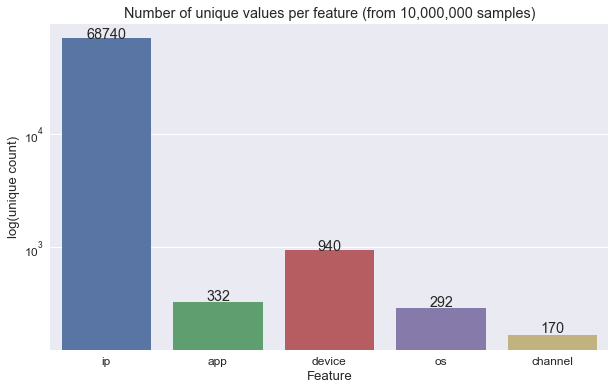

In [3]:
plt.figure(figsize=(10, 6))
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(train_df[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature (from 10,000,000 samples)')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

Check if the data is unbalanced:

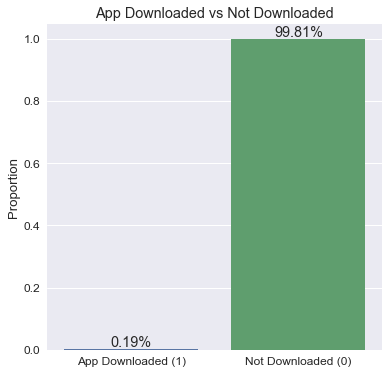

In [4]:
plt.figure(figsize=(6,6))
#sns.set(font_scale=1.2)
mean = (train_df.is_attributed.values == 1).mean()
ax = sns.barplot(['App Downloaded (1)', 'Not Downloaded (0)'], [mean, 1-mean])
ax.set(ylabel='Proportion', title='App Downloaded vs Not Downloaded')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center")

In [5]:
temp = train_df['ip'].value_counts().reset_index(name='counts')
temp.columns = ['ip', 'counts']
train_df= train_df.merge(temp, on='ip', how='left')

In [6]:
variables = ['ip', 'app', 'device', 'os', 'channel']
for v in variables:
    train_df[v] = train_df[v].astype('category')
    test_df[v]=test_df[v].astype('category')
train_df['click_time'] = pd.to_datetime(train_df['click_time'])
train_df['attributed_time'] = pd.to_datetime(train_df['attributed_time'])
test_df['click_time'] = pd.to_datetime(test_df['click_time'])
train_df['is_attributed']=train_df['is_attributed'].astype('category')

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ValueError: "Buffer dtype mismatch, expected 'Python object' but got 'long'" in 'pandas._libs.lib.is_bool_array' ignored


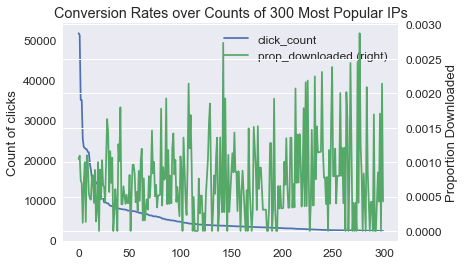

In [7]:
train_df['is_attributed']=train_df['is_attributed'].astype(int)
proportion = train_df[['ip', 'is_attributed']].groupby('ip', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = train_df[['ip', 'is_attributed']].groupby('ip', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='ip', how='left')
merge.columns = ['ip', 'click_count', 'prop_downloaded']

ax = merge[:300].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 300 Most Popular IPs')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ValueError: "Buffer dtype mismatch, expected 'Python object' but got 'long'" in 'pandas._libs.lib.is_bool_array' ignored


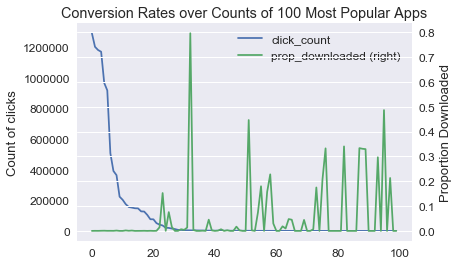

In [8]:
proportion = train_df[['app', 'is_attributed']].groupby('app', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = train_df[['app', 'is_attributed']].groupby('app', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='app', how='left')
merge.columns = ['app', 'click_count', 'prop_downloaded']

ax = merge[:100].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 100 Most Popular Apps')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

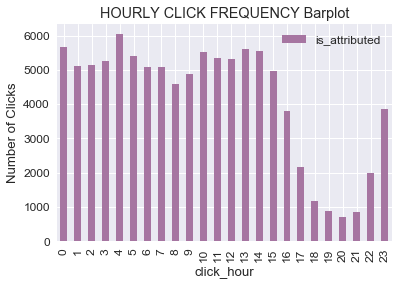

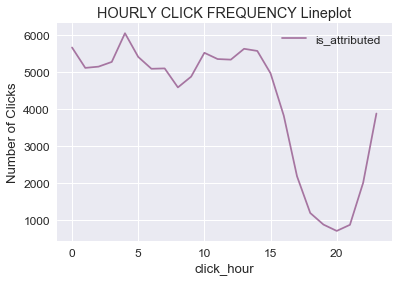

In [9]:
# click time in train_sample.csv is ordered by time
train_smp = pd.read_csv('train_sample.csv')
train_smp['click_time'] = pd.to_datetime(train_smp['click_time'])
train_smp['click_hour']=train_smp['click_time'].dt.hour
train_smp['attributed_time'] = pd.to_datetime(train_smp['attributed_time'])
#round the time to nearest hour
train_smp['click_rnd']=train_smp['click_time'].dt.round('H')  
train_smp[['click_hour','is_attributed']].groupby(['click_hour'], as_index=True).count().plot(kind='bar', color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Barplot');
plt.ylabel('Number of Clicks');

train_smp[['click_hour','is_attributed']].groupby(['click_hour'], as_index=True).count().plot(color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Lineplot');
plt.ylabel('Number of Clicks');